<h1 style='color: green; font-size: 36px; font-weight: bold;'>Análise de data - Blood Preassure</h1>

## Importing Libraries

In [1]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import *

#PANDAS
import pandas as pd
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 100)
import numpy as np

#STATSMODEL
import statsmodels.api as sm

#SEABORN
import seaborn as sns #library especializada em visualização de data estatísticos e baseada em matplotlib().

#SCIPY
import scipy.stats as stats
from scipy.stats import normaltest #A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

## Bibliotecas opcionais


In [2]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [3]:
!pip install plotnine

# <font color='red' style='font-size: 30px;'> ÁNALISE DE REGRESSÃO </font>
<hr style='border: 2px solid red;'>

## **Tabela para análise**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [5]:
URL = 'https://github.com/paolaosouza/blood_preassure_analysis/raw/main/data.csv'
data = pd.read_csv(URL)
data.head()

,ID,Sex,Age,Length RA,Length RA seg,Circumference RA,Triceps_Skinfold RA,Muscular Circumference RA,Fat_Index RA,Length LA,Length LA seg,Circumference LA,Triceps_Skinfold LA,Muscular Circumference LA,Fat_Index LA,SBP RA,DBP RA,SBP LA,DBP LA
0,1,m,23,38.8,38.00,31.5,14.7,26.9,0.27,38.2,36.50,30.8,17.7,25.3,0.33,106.5,62.0,112.5,60.5
1,2,f,20,31.8,28.83,25.3,22.3,18.3,0.48,32.2,30.43,25.0,22.3,18.0,0.48,100.0,56.5,102.0,56.5
2,4,f,20,35.1,34.13,22.4,24.0,14.9,0.56,34.0,33.00,22.8,23.7,15.4,0.55,98.5,58.5,95.0,59.0
3,5,m,26,35.9,34.10,27.9,9.0,25.1,0.19,35.0,33.67,27.4,6.3,25.4,0.14,122.0,66.0,121.5,70.5
4,6,f,19,31.7,29.43,28.9,37.3,17.1,0.65,31.8,29.80,29.5,34.3,18.7,0.60,101.5,64.0,101.5,64.5


In [6]:
data.loc[data['ID'] == 495, 'ID'] = [495, 1000]
data.drop(columns=['Age', 'Length RA', 'Length LA'], inplace=True)
data_bd = data[["ID", 'Sex','Length RA seg', 'Circumference RA', 'Triceps_Skinfold RA', 'Muscular Circumference RA', 'Fat_Index RA','DBP RA','SBP RA']].sort_values("ID")
data_be = data[["ID", 'Sex','Length LA seg', 'Circumference LA', 'Triceps_Skinfold LA', 'Muscular Circumference LA', 'Fat_Index LA','DBP LA','SBP LA']].sort_values("ID")

data_bd['arm'] = 'right'
data_be['arm'] = 'left'

data_bd.columns = ["id",'Sex','Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']
data_be.columns = ['id','Sex','Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']

data_be['SBP_ob'] = data_bd['SBP']
data_bd['SBP_ob'] = data_be['SBP']

data_dobrados = pd.concat([data_bd, data_be]).sort_values("id")
data_dobrados.index = list(range(1,data_dobrados.shape[0]+1))
data_dobrados.to_parquet("data_dobrados_r.parquet")

In [7]:
data_dobrados.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP,arm,SBP_ob
1,1,m,38.00,31.5,14.7,26.9,0.27,62.0,106.5,right,112.5
2,1,m,36.50,30.8,17.7,25.3,0.33,60.5,112.5,left,106.5
3,2,f,28.83,25.3,22.3,18.3,0.48,56.5,100.0,right,102.0
4,2,f,30.43,25.0,22.3,18.0,0.48,56.5,102.0,left,100.0
5,4,f,34.13,22.4,24.0,14.9,0.56,58.5,98.5,right,95.0


## Gráfico de interação

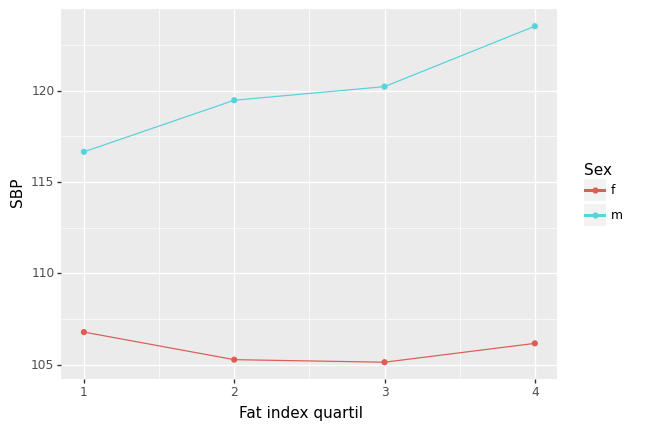

<ggplot: (8759846527573)>

In [8]:
quartil = pd.qcut(data_dobrados['Fat_Index'], [0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4]).astype(int)
sexo = data_dobrados['Sex']
y = data_dobrados['SBP']


inter = pd.DataFrame()
inter['fat_index'] = quartil
inter['sex'] = sexo
inter['SBP'] = y

mean_group = inter.groupby(['sex', 'fat_index'])['SBP'].mean().reset_index()

(
    ggplot(mean_group, aes(x='fat_index', y='SBP', color='sex')) + 
    geom_point() + 
    labs(x='Fat index quartil', color='Sex') + 
    geom_line()
)

Links úteis: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/interaction-plot/interpret-the-results/

https://statisticsbyjim.com/regression/interaction-effects/


Np gráfico temos a média do SBP variando o quartil do índice de gordura e Sexo. Vemos que claramente há uma diferença entre a pressão de homens e mulheres. Ao variar o índice de gordura, vemos que comportamento da pressão entre os sexos não varia tanto (as linhas são aproximadamente paralelas), indicando que existe uma pequena interação, mas que não aparenta ser tão forte. 

Portanto, apesar de existir uma associação entre Sexo e índice de Gordura, ambas não parecem interagir de maneira relevante ao serem relacionadas com o SBP.

Isso foi de certa forma observado no modelo, já que a interação não foi significativa.

In [9]:
mean_group.query("sex=='f'")

,sex,fat_index,SBP
0,f,1,106.783333
1,f,2,105.274038
2,f,3,105.134298
3,f,4,106.165842


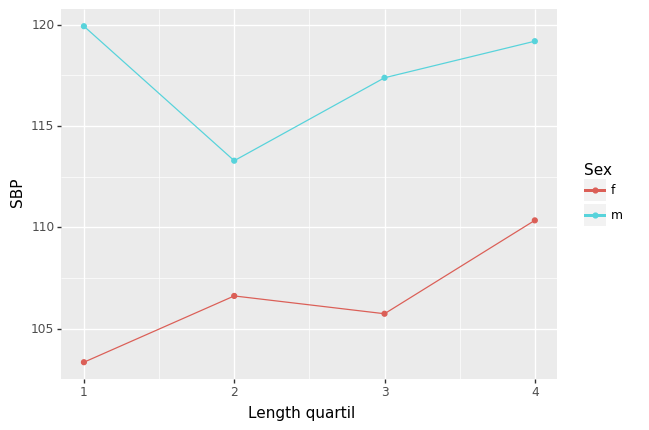

<ggplot: (8759842899997)>

In [10]:
quartil = pd.qcut(data_dobrados['Length'], [0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4]).astype(int)
sexo = data_dobrados['Sex']
y = data_dobrados['SBP']


inter = pd.DataFrame()
inter['Length'] = quartil
inter['sex'] = sexo
inter['SBP'] = y

mean_group = inter.groupby(['sex', 'Length'])['SBP'].mean().reset_index()

(
    ggplot(mean_group, aes(x='Length', y='SBP', color='sex')) + 
    geom_point() + 
    labs(x='Length quartil', color='Sex') + 
    geom_line()
)

## **Correlação**

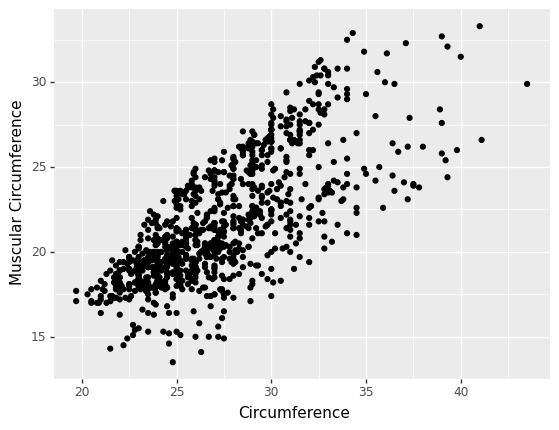

<ggplot: (8741050165253)>

In [ ]:
(
    ggplot(data_dobrados, aes(x='Circumference', y='Muscular Circumference')) + 
    geom_point()
)

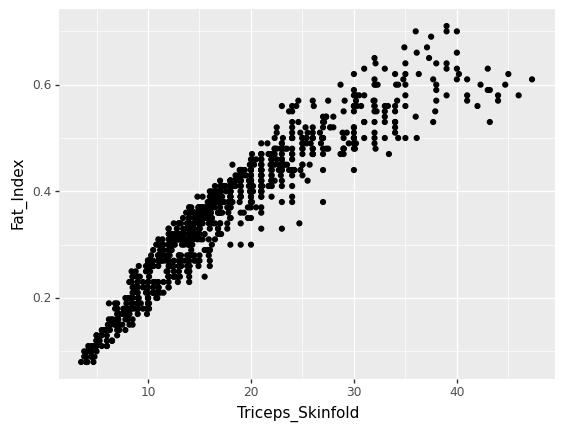

<ggplot: (8741049900737)>

In [ ]:
(
    ggplot(data_dobrados, aes(x='Triceps_Skinfold', y='Fat_Index')) + 
    geom_point()
)

In [ ]:
data_dobrados['arm_num'] = np.where(data_dobrados['arm'] == 'right', 1, 0)
data_dobrados['Sex_num'] = np.where(data_dobrados['Sex'] == 'f', 1, 0)

In [ ]:
data_dobrados['Sex_num'].mean()

0.6973415132924335

In [ ]:
from scipy.stats import pointbiserialr as bcorr

bcorr(data_dobrados.query("arm_num == 1")['Sex_num'], data_dobrados.query("arm_num == 1")['Fat_Index'])

PointbiserialrResult(correlation=0.6236290963003497, pvalue=4.760909868508799e-54)

In [ ]:
bcorr(data_dobrados.query("arm_num == 0")['Sex_num'], data_dobrados.query("arm_num == 0")['Fat_Index'])

PointbiserialrResult(correlation=0.6252297090148399, pvalue=2.138443332428035e-54)

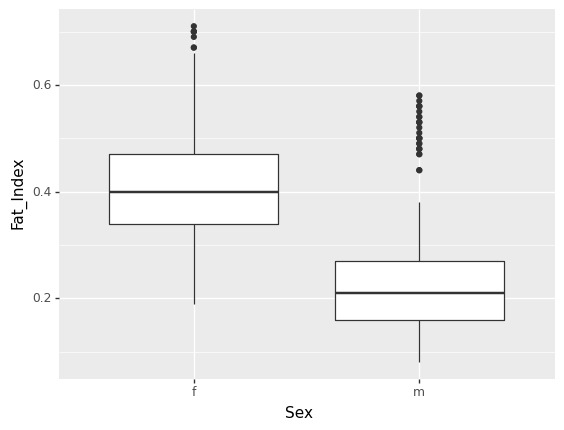

<ggplot: (8741050353541)>

In [ ]:
(
    ggplot(data_dobrados, aes(x='Sex', y='Fat_Index')) + 
    geom_boxplot()
)

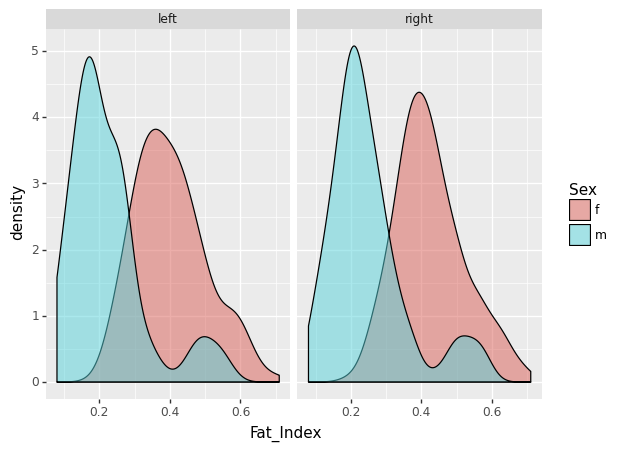

<ggplot: (8741050353557)>

In [ ]:
(
    ggplot(data_dobrados, aes(fill='Sex', x='Fat_Index')) + 
    geom_density(alpha=0.5) + 
    facet_grid(". ~ arm")
)

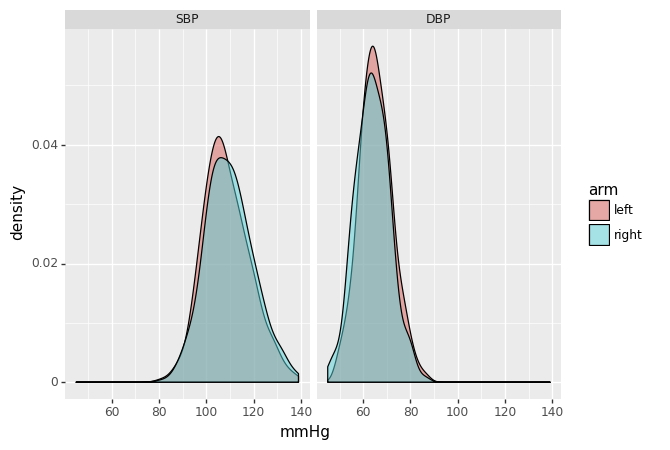

<ggplot: (8741050374649)>

In [ ]:
data_melt = data_dobrados[['DBP', 'SBP', 'arm']].melt(id_vars='arm')
data_melt['variable'] = pd.Categorical(data_melt['variable'], categories=['SBP', 'DBP'])
(
    ggplot(data_melt, aes(x='value', fill='arm')) + 
    geom_density(alpha=0.5) + 
    #geom_histogram() + 
    facet_grid(". ~ variable")+
    labs(x = "mmHg")
)

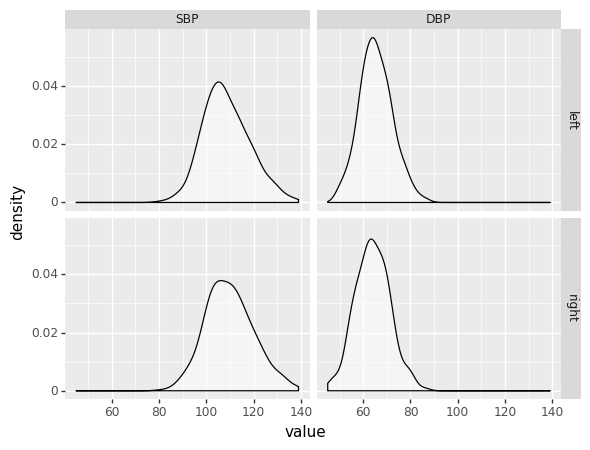

<ggplot: (8741049812933)>

In [ ]:
(
    ggplot(data_melt, aes(x='value')) + 
    geom_density(alpha=0.5, fill='white') + 
    #geom_histogram(fill='white') + 
    facet_grid("arm ~ variable")
)

In [ ]:
bcorr(data_dobrados.query("arm_num == 1")['Sex_num'], data_dobrados.query("arm_num == 1")['SBP'])

PointbiserialrResult(correlation=-0.5541773517567219, pvalue=1.032026522440282e-40)

In [ ]:
bcorr(data_dobrados.query("arm_num == 0")['Sex_num'], data_dobrados.query("arm_num == 0")['SBP'])

PointbiserialrResult(correlation=-0.5742021896711972, pvalue=3.1071980675887845e-44)

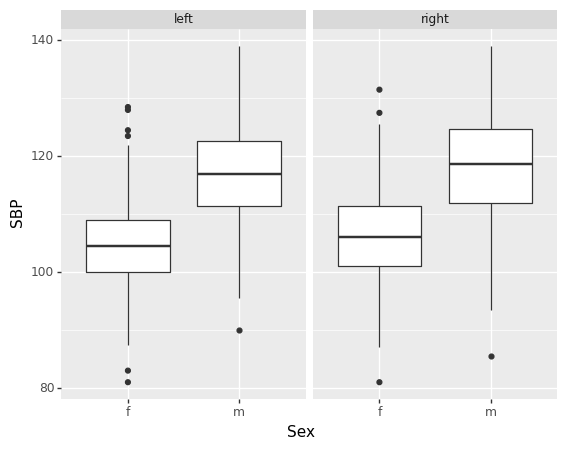

<ggplot: (8741049694065)>

In [ ]:
(
    ggplot(data_dobrados, aes(x='Sex', y='SBP')) + 
    geom_boxplot() + 
    facet_grid(". ~ arm")
)

#### **Gráficos de dispersão entre as variáveis do dataset**

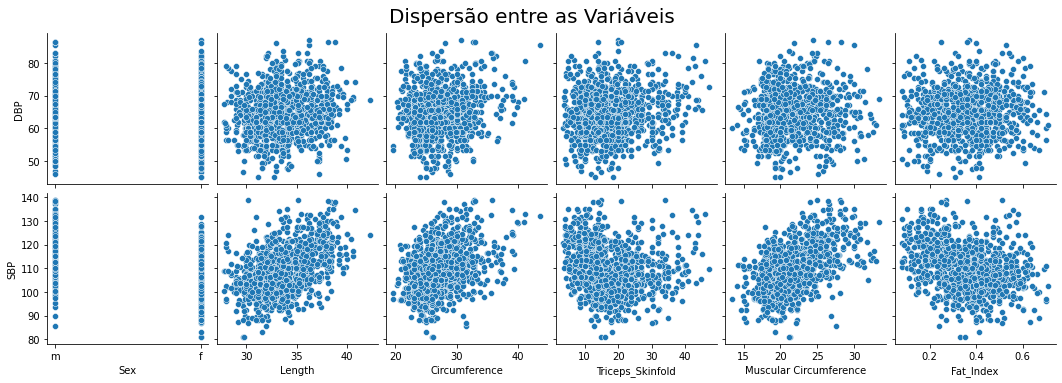

In [ ]:
ax = sns.pairplot(data_dobrados, y_vars=['DBP', 'SBP'], x_vars=['Sex', 'Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

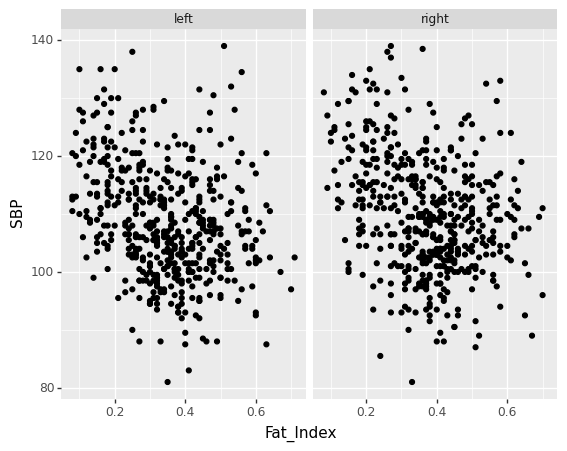

<ggplot: (8741050504057)>

In [ ]:
(
    ggplot(data_dobrados, aes(x='Fat_Index', y='SBP')) + 
    geom_point() + 
    facet_grid(". ~ arm")
)

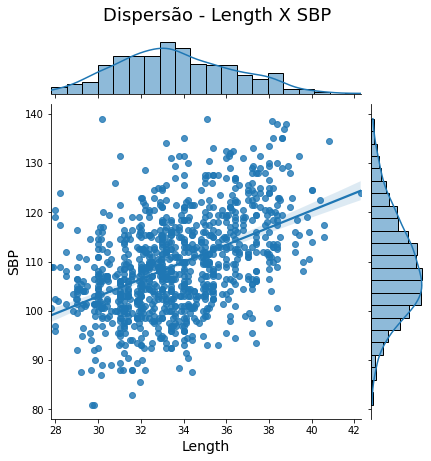

In [ ]:
ax = sns.jointplot(x="Length", y="SBP", data=data_dobrados, kind='reg')
ax.fig.suptitle('Dispersão - Length X SBP ', fontsize=18, y=1.05)
ax.set_axis_labels("Length", "SBP", fontsize=14)
ax

## <font color='red' style='font-size: 22px;'> Modelo 1 de Regressão Linear </font>
<hr style='border: 2px solid red;'>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *

In [ ]:
data_dobrados['arm'] = np.where(data_dobrados['arm'] == 'right', 1, 0)
data_dobrados['Sex'] = np.where(data_dobrados['Sex'] == 'f', 1, 0)

In [ ]:
data_dobrados.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP,arm,SBP_ob,arm_num,Sex_num
1,1,0,38.00,31.5,14.7,26.9,0.27,62.0,106.5,1,112.5,1,0
2,1,0,36.50,30.8,17.7,25.3,0.33,60.5,112.5,0,106.5,0,0
3,2,1,28.83,25.3,22.3,18.3,0.48,56.5,100.0,1,102.0,1,1
4,2,1,30.43,25.0,22.3,18.0,0.48,56.5,102.0,0,100.0,0,1
5,4,1,34.13,22.4,24.0,14.9,0.56,58.5,98.5,1,95.0,1,1


In [ ]:
data_dobrados = data_dobrados.sort_values(["arm", "id"])

In [ ]:
{
    "Sem Circumference": 6916,
    "Sem Muscular Circumference": 6910,
    "Com braço": 6904
}


{'Com braço': 6904,
 'Sem Circumference': 6916,
 'Sem Muscular Circumference': 6910}

In [ ]:
data_dobrados = data_dobrados.sort_values(["arm", "id"])
data_dobrados.columns = data_dobrados.columns.str.replace(" ", "_")

In [ ]:
data_dobrados.columns

Index(['id', 'Sex', 'Length', 'Circumference', 'Triceps_Skinfold',
       'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP', 'arm', 'SBP_ob',
       'arm_num', 'Sex_num'],
      dtype='object')

In [ ]:
mod_e = smf.ols(formula='SBP ~  Circumference+Fat_Index + Length', 
                data=data_dobrados.query("arm_num == 0"))

mod_d = smf.ols(formula='SBP ~  Circumference+Fat_Index + Length', 
                data=data_dobrados.query("arm_num == 1"))

fitted_e = mod_e.fit()
fitted_d = mod_d.fit()

In [ ]:
fitted_e.compare_lr_test(fitted_e)

(-0.0, nan, 0.0)

In [ ]:
print(fitted_d.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     69.68
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.74e-37
Time:                        11:09:19   Log-Likelihood:                -1737.2
No. Observations:                 489   AIC:                             3482.
Df Residuals:                     485   BIC:                             3499.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        59.9715      6.026      9.952

In [ ]:
print(fitted_e.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     90.57
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.50e-46
Time:                        11:09:19   Log-Likelihood:                -1701.7
No. Observations:                 489   AIC:                             3411.
Df Residuals:                     485   BIC:                             3428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1494      5.704      9.317

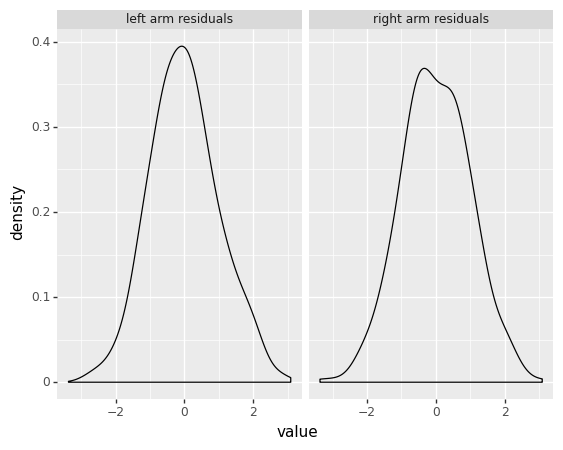

<ggplot: (8741061549473)>

In [ ]:
res_e = fitted_e.resid_pearson
res_d = fitted_d.resid_pearson
data_dobrados['resid_mod'] = list(res_d) + list(res_e)
res_df = pd.DataFrame({"left arm residuals": res_e, 'right arm residuals': res_d})

(
    ggplot(res_df.melt(), aes(x='value')) + 
    geom_density() + 
    facet_grid(". ~ variable")
)

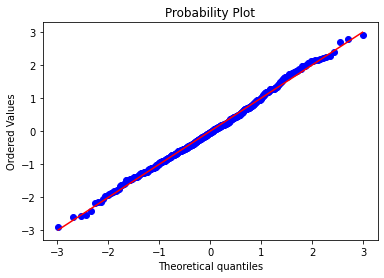

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res_e, dist="norm", plot=plt)

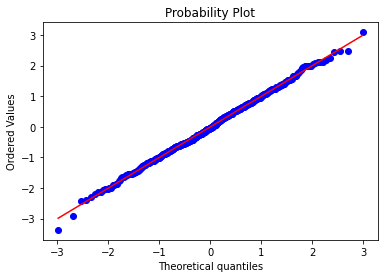

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res_d, dist="norm", plot=plt)

In [ ]:
from scipy.stats import probplot
from scipy.stats import shapiro
def teste_normalAge_shapiro(data):
    for i in data.columns:
        w_test, p_valor = shapiro(data[[i]])
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            
teste_normalAge_shapiro(res_df)

 ************* left arm residuals - Distribuição normal com p-valor: 0.2313
 ************* right arm residuals - Distribuição normal com p-valor: 0.9711


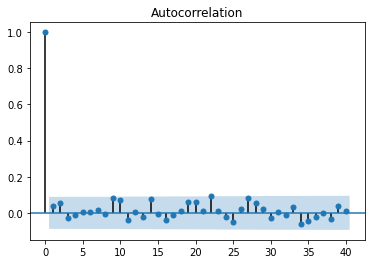

In [ ]:
sm.graphics.tsa.plot_acf(res_e, lags=40)
plt.show()

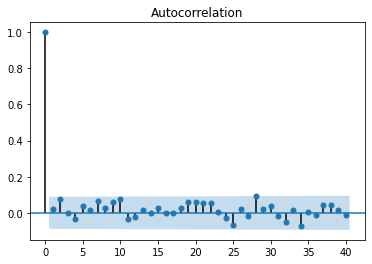

In [ ]:
sm.graphics.tsa.plot_acf(res_d, lags=40)
plt.show()

## Regressão para as faixas 

In [ ]:
data_e = data_dobrados.query("arm == 0")
data_d = data_dobrados.query("arm == 1")

In [ ]:
data_e.columns

Index(['id', 'Sex', 'Length', 'Circumference', 'Triceps_Skinfold',
       'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP', 'arm', 'SBP_ob',
       'arm_num', 'Sex_num', 'resid_mod'],
      dtype='object')

In [ ]:
inters = [
          [22.87, 24.46],
          [24.46, 26.05],
          [26.05, 27.63],
          [27.63, 29.22],
          [29.22, 30.81]
]

In [ ]:
bd_inter = pd.DataFrame()
for inter, cod in zip(inters, list(range(0, len(inters)))):
  bd = data_e.query(f"Circumference > {inter[0]} & Circumference <= {inter[1]}").copy()
  bd['interval'] = cod 
  bd_inter = bd_inter.append(bd)

bd_inter['interval'] = pd.Categorical(bd_inter['interval'])

In [ ]:
mod_inter_e = smf.ols(formula='SBP ~  interval*Fat_Index + Length ', data=bd_inter)
fitted_inter_e = mod_inter_e.fit()
print(fitted_inter_e.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     16.80
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           7.06e-25
Time:                        11:09:21   Log-Likelihood:                -1264.6
No. Observations:                 364   AIC:                             2551.
Df Residuals:                     353   BIC:                             2594.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## <font color='red' style='font-size: 22px;'> Modelo de Regressão Linear Sexo</font>
<hr style='border: 2px solid red;'>


In [ ]:
data_dobrados.groupby(['Sex'])['Fat_Index'].describe().reset_index()

,Sex,count,mean,std,min,25%,50%,75%,max
0,0,296.0,0.236115,0.110057,0.08,0.16,0.21,0.27,0.58
1,1,682.0,0.413710,0.099589,0.19,0.34,0.40,0.47,0.71


In [ ]:
res_e = fitted_e.resid_pearson
res_d = fitted_d.resid_pearson
data_dobrados['resid_mod'] = list(res_d) + list(res_e)

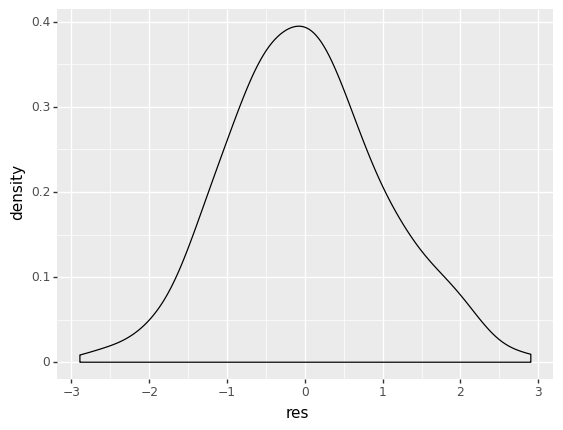

<ggplot: (8741050220041)>

In [ ]:
res = res_e
res_df = pd.DataFrame({"res": res})

(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

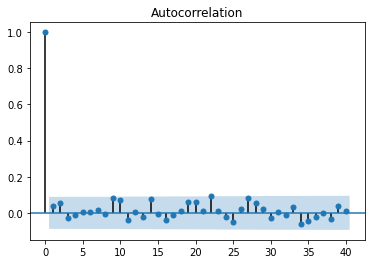

In [ ]:
sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()

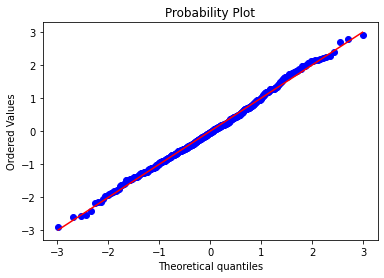

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res, dist="norm", plot=plt)

In [ ]:
from scipy.stats import probplot
from scipy.stats import shapiro
def teste_normalAge_shapiro(data):
    for i in data.columns:
        w_test, p_valor = shapiro(data[[i]])
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            
teste_normalAge_shapiro(res_df)

 ************* res - Distribuição normal com p-valor: 0.2313


In [ ]:
data_dobrados = data_dobrados.sort_values("id")
data_dobrados['id'] = data_dobrados['id'].astype(str)
mod = smf.ols(formula='SBP ~ Fat_Index + Circumference + Length + arm + Sex', 
              data=data_dobrados)
fitted = mod.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           3.63e-97
Time:                        11:09:22   Log-Likelihood:                -3406.6
No. Observations:                 978   AIC:                             6825.
Df Residuals:                     972   BIC:                             6854.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        76.2417      4.670     16.325

Fixando um valor qualquer para o Length, Circumference e arm. Ao variar x unAges no Fat_Index o SBP, em média, diminuirá x*16.6886 unAges.

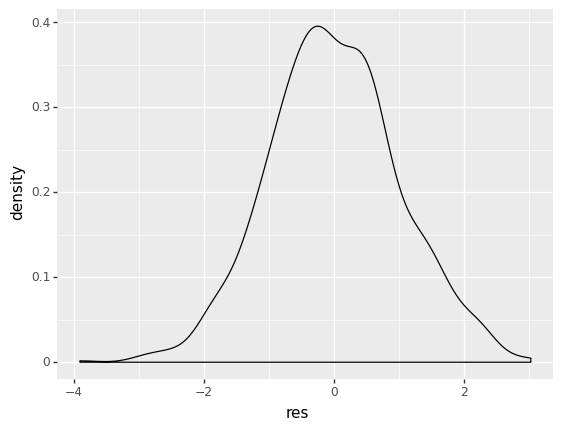

<ggplot: (8741050131445)>

In [ ]:
res = fitted.resid_pearson
res_df = pd.DataFrame({"res": res})

(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

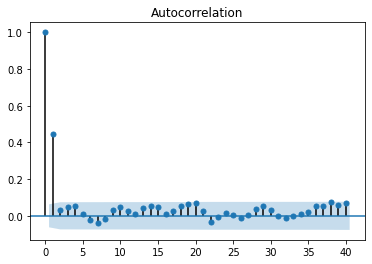

In [ ]:
sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()

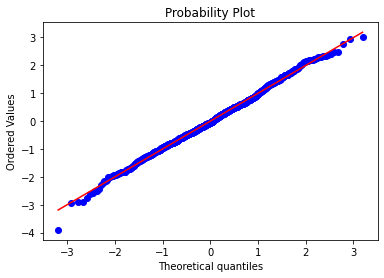

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res, dist="norm", plot=plt)

In [ ]:
teste_normalAge_shapiro(res_df)

 ************* res - Distribuição normal com p-valor: 0.1856


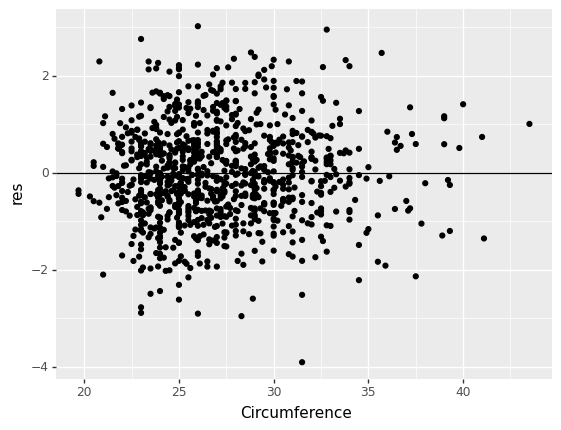

<ggplot: (8741050024729)>

In [ ]:
res_df['Circumference'] = data_dobrados['Circumference']
res_df['Fat_Index'] = data_dobrados['Fat_Index']
res_df['Length'] = data_dobrados['Length']
res_df['arm'] = data_dobrados['arm']

(
    ggplot(res_df, aes(x="Circumference", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0)
)


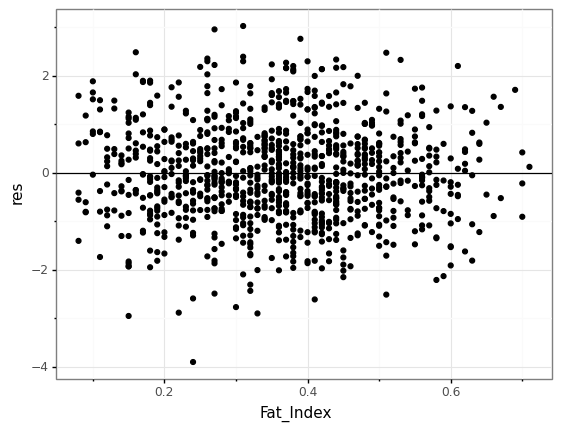

<ggplot: (8741050034357)>

In [ ]:
(
    ggplot(res_df, aes(x="Fat_Index", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

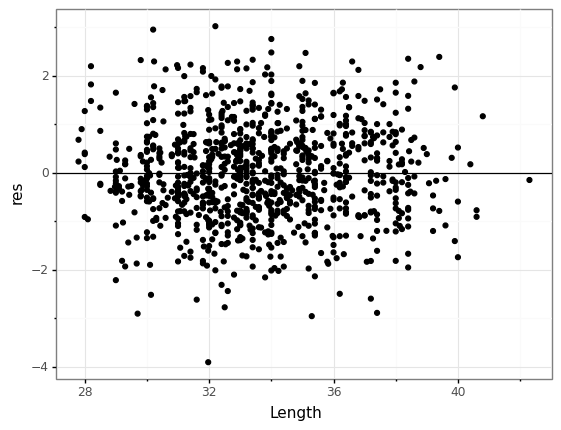

<ggplot: (8741050024785)>

In [ ]:
(
    ggplot(res_df, aes(x="Length", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

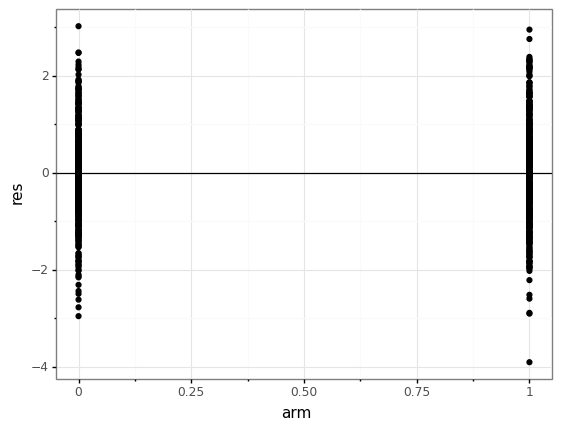

<ggplot: (8741049914045)>

In [ ]:
(
    ggplot(res_df, aes(x="arm", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

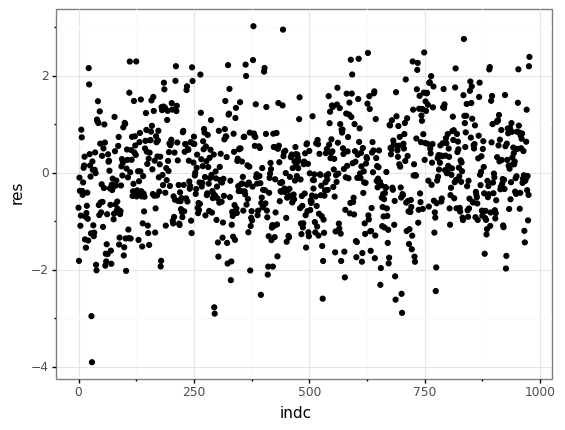

<ggplot: (8741049940277)>

In [ ]:
res_df['indc'] = list(range(len(res_df))) 
(
    ggplot(res_df, aes(x="indc", y="res")) + 
    geom_point() + 
    theme_bw()
)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res)

1.1059903410662062

O modelo normal é dado pela equação:

$$Y_i = \beta_0 + \mathbf{x}_i\boldsymbol{\beta} + e_i$$.

O modelo assume que o resíduo é normalmente distribuído $e_i \overset{idd}{\sim} N(0, \sigma^2)$. Ou seja, $e_i$ deve normal centrado 0, independênte e com variância $\sigma^2$ constante (homocedástico).

In [ ]:
data_dobrados.columns.str.replace(" ", "_")

Index(['id', 'Sex', 'Length', 'Circumference', 'Triceps_Skinfold',
       'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP', 'arm', 'SBP_ob',
       'arm_num', 'Sex_num', 'resid_mod'],
      dtype='object')

$$Y_{ij} = \beta_0 + \mathbf{x}_i\boldsymbol{\beta} + \delta_j+ e_i$$.


In [ ]:
data_dobrados.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular_Circumference,Fat_Index,DBP,SBP,arm,SBP_ob,arm_num,Sex_num,resid_mod
2,1,0,36.50,30.8,17.7,25.3,0.33,60.5,112.5,0,106.5,0,0,-1.551350
1,1,0,38.00,31.5,14.7,26.9,0.27,62.0,106.5,1,112.5,1,0,-0.379654
4,2,1,30.43,25.0,22.3,18.0,0.48,56.5,102.0,0,100.0,0,1,-0.170698
3,2,1,28.83,25.3,22.3,18.3,0.48,56.5,100.0,1,102.0,1,1,0.111510
6,4,1,33.00,22.8,23.7,15.4,0.55,59.0,95.0,0,98.5,0,1,-0.531835


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_f = data_dobrados.copy()
data_f.columns = data_f.columns.str.replace(" ", "_")

md = smf.mixedlm("SBP ~ Fat_Index + Circumference + Length + Sex + arm", data_f, groups=data_f["arm"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: SBP       
No. Observations:  978     Method:             REML      
No. Groups:        2       Scale:              62.4680   
Min. group size:   489     Likelihood:         -3407.3673
Max. group size:   489     Converged:          Yes       
Mean group size:   489.0                                 
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept     76.242    9.180  8.305 0.000  58.248 94.235
Fat_Index     -0.174    3.014 -0.058 0.954  -6.080  5.733
Circumference  0.481    0.089  5.427 0.000   0.307  0.654
Length         0.744    0.119  6.271 0.000   0.512  0.977
Sex           -8.066    0.955 -8.446 0.000  -9.937 -6.194
arm            1.200   11.189  0.107 0.915 -20.730 23.130
Group Var     62.468                                     



In [ ]:
res = mdf.resid
res_df = pd.DataFrame()
res_df['res'] = res

In [ ]:
durbin_watson(res)

1.1059903410662077

In [ ]:
teste_normalAge_shapiro(res_df)

 ************* res - Distribuição normal com p-valor: 0.1857


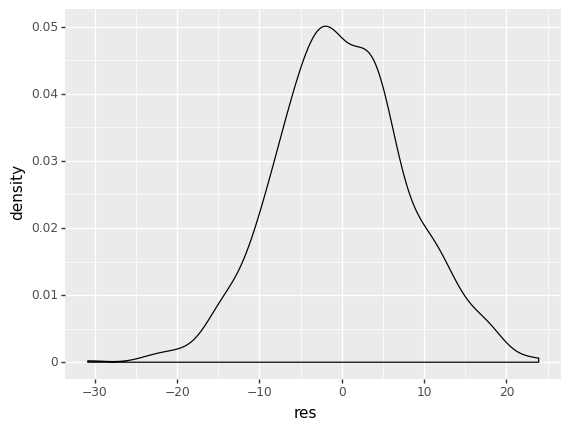

<ggplot: (8741050055917)>

In [ ]:
(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

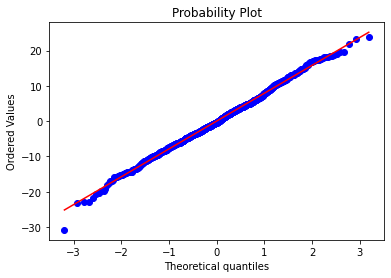

In [ ]:
pl = probplot(res, dist="norm", plot=plt)

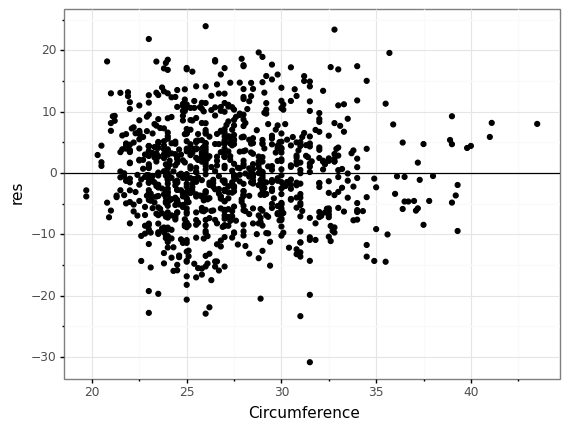

<ggplot: (8741050022673)>

In [ ]:
res_df['Circumference'] = data_dobrados['Circumference']
res_df['Fat_Index'] = data_dobrados['Fat_Index']
res_df['Length'] = data_dobrados['Length']
res_df['arm'] = data_dobrados['arm']

(
    ggplot(res_df, aes(x="Circumference", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

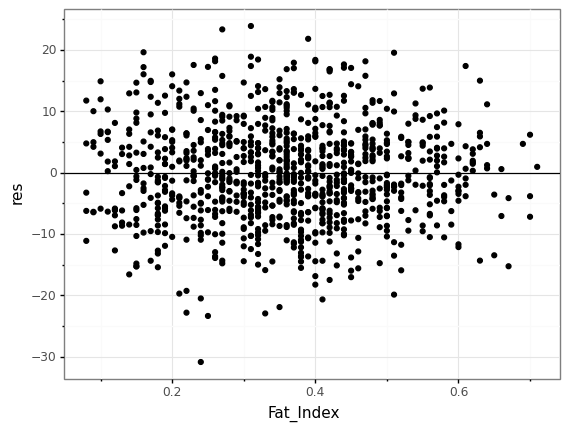

<ggplot: (8741050167873)>

In [ ]:
(
    ggplot(res_df, aes(x="Fat_Index", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

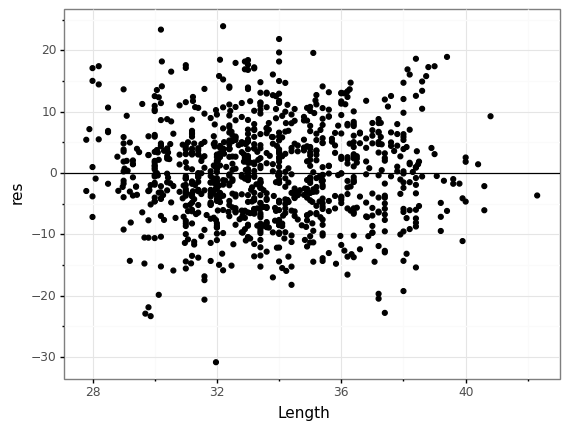

<ggplot: (8741050372137)>

In [ ]:
(
    ggplot(res_df, aes(x="Length", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

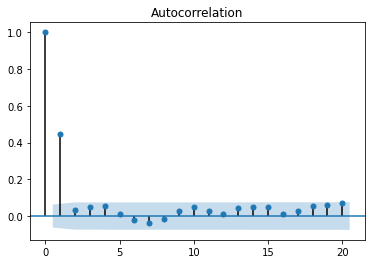

In [ ]:
sm.graphics.tsa.plot_acf(mdf.resid, lags=20)
plt.show()